Step 1 : we will import Packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

Step 2 : Loading Dataset

In [4]:
data = pd.read_csv("wine.csv")

Step 3 : have a look at the dataset

In [5]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Step 4 : we will divide the data into independent and dependent variable 

In [6]:
real_x = data.iloc[:,1:14].values
real_y = data.iloc[:,0].values

Step 5 : Split the data into test and training set 

In [7]:
x_train,x_test,y_train,y_test = train_test_split(real_x, real_y , test_size = 0.20)

Step 6 : Fitting the model 

In [8]:
RFC = RandomForestClassifier(n_estimators=800 , random_state = 0)
RFC.fit(real_x, real_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
y_pred = RFC.predict(x_test)

Step 7 : predicting matric

In [10]:
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.0
[[11  0  0]
 [ 0 17  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy: 1.0


In [11]:
RFC.feature_importances_

array([0.12472392, 0.03097522, 0.01355506, 0.02823433, 0.03047462,
       0.04971925, 0.15855212, 0.01127766, 0.02287424, 0.16080014,
       0.07668218, 0.12029776, 0.17183349])

In [12]:
features = data.columns.values.tolist()[1:14]
feature_imp = pd.Series(RFC.feature_importances_,index=features).sort_values(ascending=False)

In [13]:
feature_imp

Proline                 0.171833
Color.int               0.160800
Flavanoids              0.158552
Alcohol                 0.124724
OD                      0.120298
Hue                     0.076682
Phenols                 0.049719
Malic.acid              0.030975
Mg                      0.030475
Acl                     0.028234
Proanth                 0.022874
Ash                     0.013555
Nonflavanoid.phenols    0.011278
dtype: float64

Step 7 : Feature Visualisation 

No handles with labels found to put in legend.


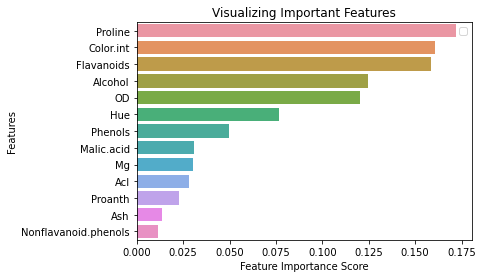

In [14]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
# Print X_train
print(x_train[:5])

[[1.419e+01 1.590e+00 2.480e+00 1.650e+01 1.080e+02 3.300e+00 3.930e+00
  3.200e-01 1.860e+00 8.700e+00 1.230e+00 2.820e+00 1.680e+03]
 [1.233e+01 1.100e+00 2.280e+00 1.600e+01 1.010e+02 2.050e+00 1.090e+00
  6.300e-01 4.100e-01 3.270e+00 1.250e+00 1.670e+00 6.800e+02]
 [1.253e+01 5.510e+00 2.640e+00 2.500e+01 9.600e+01 1.790e+00 6.000e-01
  6.300e-01 1.100e+00 5.000e+00 8.200e-01 1.690e+00 5.150e+02]
 [1.243e+01 1.530e+00 2.290e+00 2.150e+01 8.600e+01 2.740e+00 3.150e+00
  3.900e-01 1.770e+00 3.940e+00 6.900e-01 2.840e+00 3.520e+02]
 [1.234e+01 2.450e+00 2.460e+00 2.100e+01 9.800e+01 2.560e+00 2.110e+00
  3.400e-01 1.310e+00 2.800e+00 8.000e-01 3.380e+00 4.380e+02]]


In [16]:
# Print y_train
for i in range(len(y_train)):
    y_train[i] = y_train[i]-1

In [17]:
print(y_train[:5])

[0 1 2 1 1]


step 8 :  Drop a column 

# Xg boost

In [18]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

Setting Parameters

In [19]:
menu = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.20,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 550  # the number of training iterations

In [21]:
bst = xgb.train(menu, dtrain, num_round)

[03:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
preds = bst.predict(dtest)

In [23]:
print(preds)

[[1.6935160e-03 9.9692303e-01 1.3834696e-03]
 [1.2246962e-03 9.9749541e-01 1.2798783e-03]
 [2.5090292e-02 9.4642651e-01 2.8483188e-02]
 [1.6873743e-01 1.8957359e-01 6.4168894e-01]
 [9.9313277e-01 4.0556425e-03 2.8116426e-03]
 [9.9011630e-01 7.7944798e-03 2.0892178e-03]
 [6.3788760e-03 1.5958197e-03 9.9202538e-01]
 [3.2690972e-02 9.4198954e-01 2.5319519e-02]
 [9.9487263e-01 3.0280587e-03 2.0992539e-03]
 [9.9393857e-01 2.3146751e-03 3.7467282e-03]
 [1.9754532e-03 1.7014723e-03 9.9632311e-01]
 [2.2836907e-03 4.0077325e-03 9.9370861e-01]
 [1.6924592e-03 9.9630094e-01 2.0066353e-03]
 [2.6438106e-03 9.8577279e-01 1.1583449e-02]
 [9.9480802e-01 2.7486563e-03 2.4433420e-03]
 [2.8736955e-03 7.5739995e-03 9.8955232e-01]
 [9.8807794e-01 4.1166260e-03 7.8054299e-03]
 [8.6409104e-04 9.9556822e-01 3.5676814e-03]
 [9.8888421e-01 6.6455281e-03 4.4702999e-03]
 [3.6539736e-03 9.9485379e-01 1.4922044e-03]
 [9.9617118e-01 1.7268845e-03 2.1019939e-03]
 [3.0941321e-03 9.9541289e-01 1.4930429e-03]
 [1.581574

In [24]:
best_preds = np.asarray([np.argmax(line) for line in preds])
print(np.mean(best_preds != y_test))
print(confusion_matrix(y_test, best_preds))  
print(classification_report(y_test, best_preds))
print("Accuracy:", metrics.accuracy_score(y_test, best_preds))

0.9722222222222222
[[ 0  0  0  0]
 [11  0  0  0]
 [ 0 16  1  0]
 [ 0  0  8  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        11
           2       0.11      0.06      0.08        17
           3       0.00      0.00      0.00         8

    accuracy                           0.03        36
   macro avg       0.03      0.01      0.02        36
weighted avg       0.05      0.03      0.04        36

Accuracy: 0.027777777777777776


C:\Users\user\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
